# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #BA1141; text-align: center; line-height: 1.25;"><b>💔🔮 Heart Disease Prediction<span style="color: #0000FF "> Model Training 🔮💔</span></b><br><span style="color: #FF5C8A; font-size: 24px">By Shrihith A </span></h1>

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;;text-align:center">💔 | Model Training for Heart Disease Prediction - Shrihith A | 👋</div>

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">1. | Importing Libraries 📚</div>
<div style="font-family: Segoe UI; line-height: 2; color: #FFFFF; text-align: justify">
    👉 <b>Importing libraries</b> that will be used in this notebook.
</div>

In [32]:
# --- Importing Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick
import pickle

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap
import xgboost as xgb

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">2. | Color Palettes 🎨</div>
<div style="font-family: Segoe UI; line-height: 2; color: #FFFFF; text-align: justify">
    👉 This section will create some <b>color palettes</b> that will be used in this notebook.
</div>

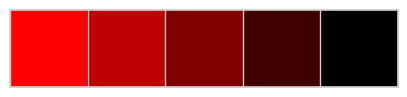

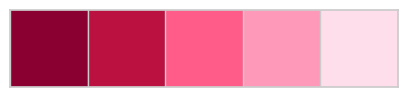

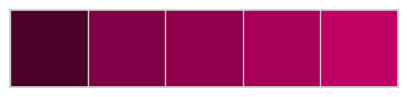

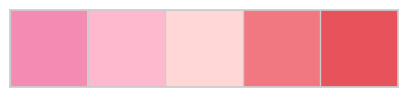

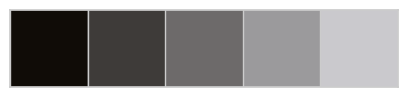

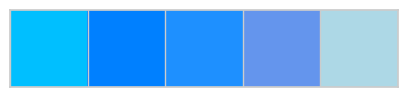

In [2]:
# --- Create List of Color Palletes ---
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']
blue_grad = ['#00BFFF', '#0080FF', '#1E90FF', '#6495ED', '#ADD8E6']

# --- Plot Color Palletes --
sns.palplot(red_grad)
sns.palplot(pink_grad)
sns.palplot(purple_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)
sns.palplot(blue_grad)

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">3. | Reading Dataset 👓</div>
<div style="font-family: Segoe UI; line-height: 2; color: #FFFFF; text-align: justify">
    👉 After importing libraries, <b>the dataset that will be used will be imported</b>.
</div>

In [4]:
df = pd.read_csv("./data/Heart_Disease_Dataset.csv")
df.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1
37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1
41,0,1,130,204,0,0,172,0,1.400000,2,0,2,1
56,1,1,120,236,0,1,178,0,0.800000,2,0,2,1
57,0,0,120,354,0,1,163,1,0.600000,2,0,2,1


In [5]:
# --- Print Dataset Info ---
print('\033[1m'+'.: Dataset Info :.'+'\033[0m')
print('*' * 30)
print('Total Rows:'+'\033[1m', df.shape[0])
print('\033[0m'+'Total Columns:'+'\033[1m', df.shape[1])
print('\033[0m'+'*' * 30)
print('\n')

# --- Print Dataset Detail ---
print('\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('*' * 30)
df.info(memory_usage = False)

.: Dataset Info :.
******************************
Total Rows: 303
Total Columns: 14
******************************


.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)

# <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;">4. | Dataset Pre-processing ⚙</div>
<div style="font-family: Segoe UI; line-height: 2; color: #fffff; text-align: justify">
    👉 This section will <b>prepare the dataset</b> before building the machine learning models.
</div>

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">4.1 | One-Hot Encoding 🔧</div>
<div style="font-family: Segoe UI; line-height: 2; color: #fffff; text-align: justify">
    👉 The data pre-processing will be transforming categorical variables using <b>one-hot encoding technique</b>.
</div>

In [6]:
# --- Creating Dummy Variables for cp, thal and slope ---
cp = pd.get_dummies(df['cp'], prefix='cp')
thal = pd.get_dummies(df['thal'], prefix='thal')
slope = pd.get_dummies(df['slope'], prefix='slope')

# --- Merge Dummy Variables to Main Data Frame ---
frames = [df, cp, thal, slope]
df = pd.concat(frames, axis = 1)

In [7]:
# --- Display New Data Frame ---
df.head().style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0
37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1,0,0,1,0,0,0,1,0,1,0,0
41,0,1,130,204,0,0,172,0,1.400000,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
56,1,1,120,236,0,1,178,0,0.800000,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
57,0,0,120,354,0,1,163,1,0.600000,2,0,2,1,1,0,0,0,0,0,1,0,0,0,1


<div style="font-family: Segoe UI; line-height: 2; color: #fffff; text-align: justify">
    👉 After creating dummy variables, <b>there are some unnecessary variables in the dataframe</b>. <mark><b>These variables will be dropped</b></mark> in the next part.
</div>

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">4.2 | Dropping Unnecessary Variables 🔻 </div>
<div style="font-family: Segoe UI; line-height: 2; color: #fffff; text-align: justify">
    👉 The <b>variables that unnecessary will be deleted</b>.
</div>

In [8]:
# --- Drop Unnecessary Variables ---
df = df.drop(columns = ['cp', 'thal', 'slope'])

In [9]:
# --- Display New Data Frame ---
df.head().style.background_gradient(cmap='Reds').hide_index().set_properties(**{'font-family': 'Segoe UI'})

age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
63,1,145,233,1,0,150,0,2.300000,0,1,0,0,0,1,0,1,0,0,1,0,0
37,1,130,250,0,1,187,0,3.500000,0,1,0,0,1,0,0,0,1,0,1,0,0
41,0,130,204,0,0,172,0,1.400000,0,1,0,1,0,0,0,0,1,0,0,0,1
56,1,120,236,0,1,178,0,0.800000,0,1,0,1,0,0,0,0,1,0,0,0,1
57,0,120,354,0,1,163,1,0.600000,0,1,1,0,0,0,0,0,1,0,0,0,1


## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">4.3 | Features Separating ➗</div>
<div style="font-family: Segoe UI; line-height: 2; color: #fffff; text-align: justify">
    👉 In this section, <mark><b>the 'target' (dependent) column will be seperated</b></mark> from independent columns.
</div>

In [10]:
# --- Seperating Dependent Features ---
x = df.drop(['target'], axis=1)
y = df['target']

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">4.4 | Data Normalization ⚖</div>
<div style="font-family: Segoe UI; line-height: 2; color: #fffff; text-align: justify">
    👉 In this section, data normalization will be performed to <mark><b>normalize the range of independent variables</b></mark> or features of data.<br>
    👉 Data normalization will use <mark><b>min-max normalization</b></mark>.
    <blockquote style="font-size: 12px; color: #fffff;">
    📌 <b>Min-max normalization</b> is often known as feature scaling where <mark><b>the values of a numeric range of a feature of data, are reduced to a scale between 0 and 1</b></mark>.
    </blockquote>
</div>

In [11]:
# --- Data Normalization using Min-Max Method ---
x = MinMaxScaler().fit_transform(x)

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">4.5 | Splitting the Dataset 🪓</div>
<div style="font-family: Segoe UI; line-height: 2; color: #fffff; text-align: justify">
    👉 The dataset will be splitted into <mark><b>80:20 ratio</b></mark> (80% training and 20% testing).
</div>

In [12]:
# --- Splitting Dataset into 80:20 ---
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

# <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;">5. | Model Implementation 🛠</div>
<div style="font-family: Segoe UI; line-height: 2; color: #fffff; text-align: justify">
    👉 This section will implement various machine learning models as mentioned in <b>Introduction</b> section. In addition, explanation for each models will be discussed.
</div>

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.0 | Machine Learning Modules 👨‍💻</div>
<div style="font-family: Segoe UI; line-height: 2; color: #fffff; text-align: justify">
    👉 The <b>models</b> used in this notebook:
    <ol start="1">
        <li> <b>Logistic Regression</b>,</li>
        <li> <b>K-Nearest Neighbour (KNN)</b>,</li>
        <li> <b>Support Vector Machine (SVM)</b>,</li>
        <li> <b>Gaussian Naive Bayes</b>,</li>
        <li> <b>Decision Tree</b>,</li>
        <li> <b>Random Forest</b>,</li>
        <li> <b>Extra Tree Classifier</b>,</li>
        <li> <b>Gradient Boosting</b>, and</li>
        <li> <b>AdaBoost</b>,</li>
        <li> <b>XgbBoost</b>,</li>
        <li> <b>CatBoost</b>,</li>
    </ol>
</div>

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.1 | Logistic Regression</div>
<div style="font-family: Segoe UI; line-height: 2; color: #fffff; text-align: justify">
    <blockquote style="color: #fffff;">
    <mark><b>Logistic regression</b></mark> is a statistical method that is used for building machine learning models where <b>the dependent variable is dichotomous: i.e. binary</b>. Logistic regression is used to describe data and <b>the relationship between one dependent variable and one or more independent variables</b>. The independent variables can be nominal, ordinal, or of interval type.<br><br>
    The name "logistic regression" is derived from the concept of the logistic function that it uses. <b>The logistic function is also known as the sigmoid function</b>. The value of this logistic function lies between zero and one.<br><br>
    <center>
    <img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/years-2.JPG" alt="Logistic Regression" width="40%"><br>
    <i>🖼 Logistic Function by Simplilearn</i>
    </center>
    </blockquote>
</div>

In [13]:
# --- Applying Logistic Regression ---
LRclassifier = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')
LRclassifier.fit(x_train, y_train)

y_pred_LR = LRclassifier.predict(x_test)

.:. Logistic Regression Accuracy: 91.80% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        25
           1       0.97      0.89      0.93        36

    accuracy                           0.92        61
   macro avg       0.91      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61


.: Performance Evaluation
**************************


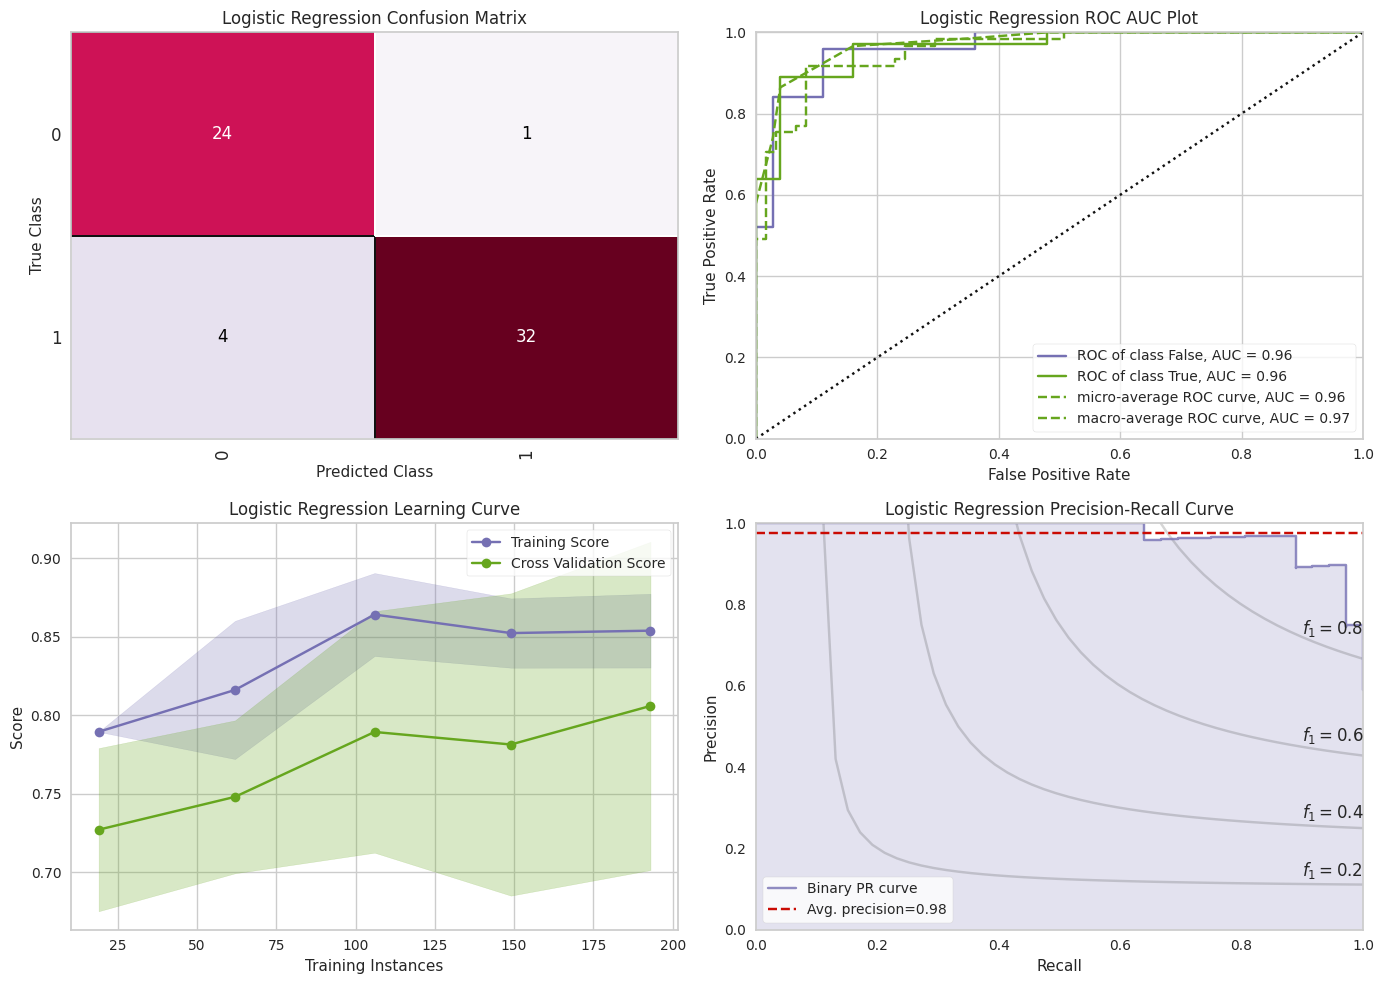

In [14]:
# --- LR Accuracy ---
LRAcc = accuracy_score(y_pred_LR, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRAcc*100)+' .:.')

# --- LR Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_LR))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- LR Confusion Matrix ---
logmatrix = ConfusionMatrix(LRclassifier, ax=ax1, cmap='PuRd',
                            title='Logistic Regression Confusion Matrix')
logmatrix.fit(x_train, y_train)
logmatrix.score(x_test, y_test)
logmatrix.finalize()

# --- LR ROC AUC ---
logrocauc = ROCAUC(LRclassifier, classes=['False', 'True'], ax=ax2,
                   title='Logistic Regression ROC AUC Plot')
logrocauc.fit(x_train, y_train)
logrocauc.score(x_test, y_test)
logrocauc.finalize()

# --- LR Learning Curve ---
loglc = LearningCurve(LRclassifier, ax=ax3, title='Logistic Regression Learning Curve')
loglc.fit(x_train, y_train)
loglc.finalize()

# --- LR Precision Recall Curve ---
logcurve = PrecisionRecallCurve(LRclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Logistic Regression Precision-Recall Curve')
logcurve.fit(x_train, y_train)
logcurve.score(x_test, y_test)
logcurve.finalize()

plt.tight_layout();

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.2 | K-Nearest Neighbour (KNN)</div>
<div style="font-family: Segoe UI; line-height: 2; color: #fffff; text-align: justify">
    <blockquote style="color: #fffff;">
    <mark><b>The k-nearest neighbors (KNN)</b></mark> algorithm is a data classification method <b>for estimating the likelihood that a data point will become a member of one group or another</b> based on what group the data points nearest to it belong to.<br><br>
    The k-nearest neighbor algorithm is a type of supervised machine learning algorithm used <b>to solve classification and regression problems</b>.<br><br>
    It's called a <b>lazy learning algorithm or lazy learner</b> because it doesn't perform any training when you supply the training data. Instead, it just stores the data during the training time and doesn't perform any calculations. It doesn't build a model until a query is performed on the dataset. This makes KNN ideal for data mining.</b></mark>.<br><br>
    <center>
    <img src="https://1.bp.blogspot.com/-D6REhf2XBwQ/XZcWn0cwSEI/AAAAAAAAAvs/LUCN8jxvzcMjkkDK4FAXSuR7MBDW8SBJgCLcBGAsYHQ/s1600/KNN_final_a1mrv9.jpg" alt="KNN" width="35%"><br>
    <i>🖼 KNN by Kita Informatika</i>
    </center>
    </blockquote>
</div>

In [15]:
# --- Applying KNN ---
KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(x_train, y_train)

y_pred_KNN = KNNClassifier.predict(x_test)

.:. K-Nearest Neighbour Accuracy: 86.89% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.77      0.96      0.86        25
           1       0.97      0.81      0.88        36

    accuracy                           0.87        61
   macro avg       0.87      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61


.: Performance Evaluation
**************************


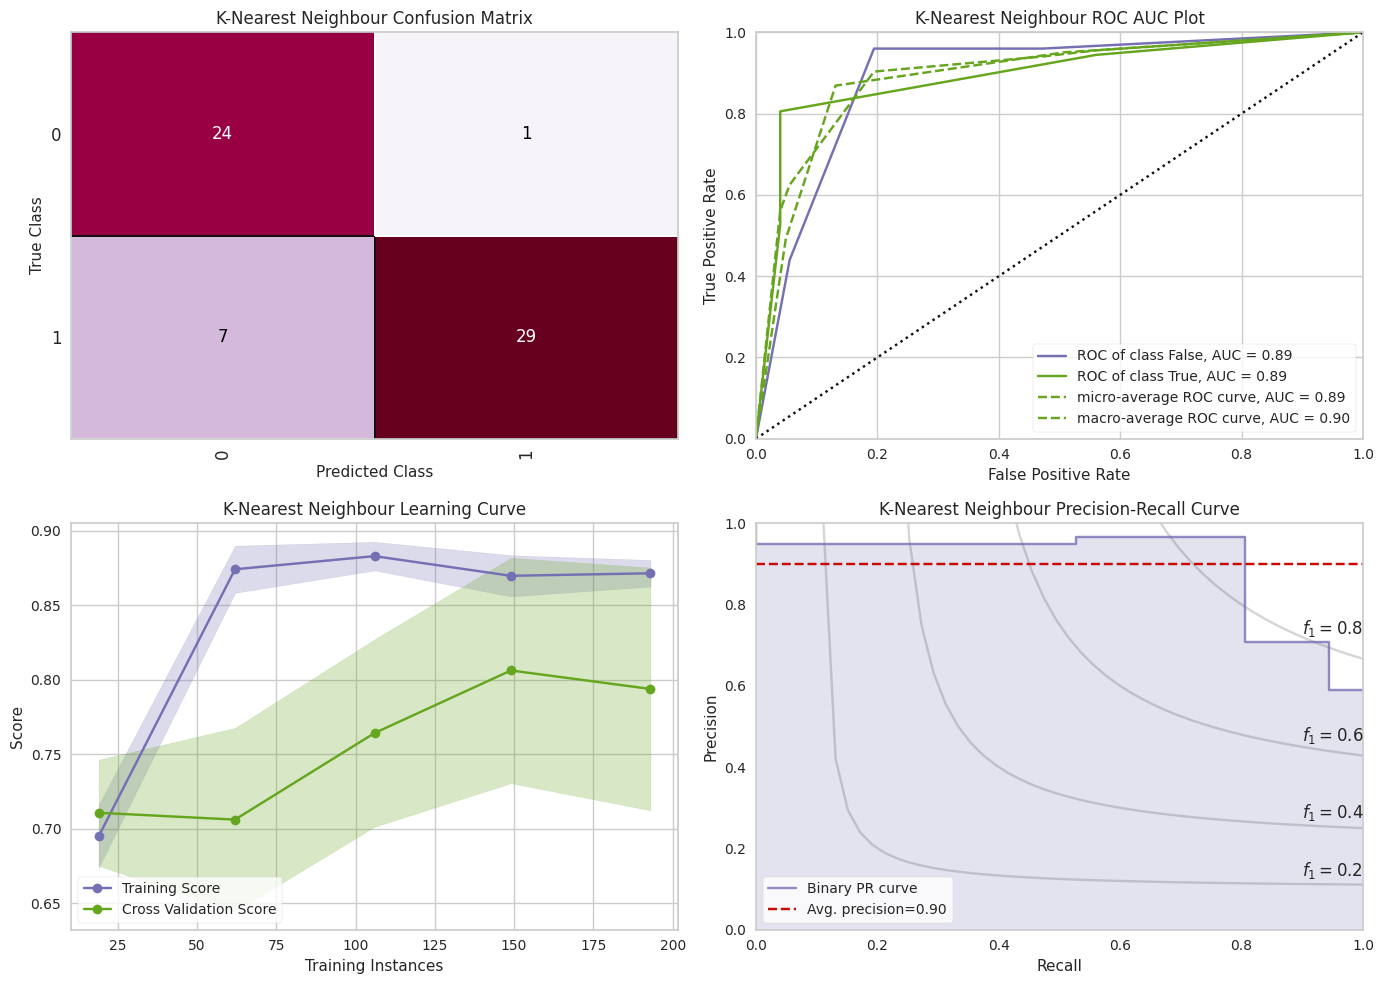

In [16]:
# --- KNN Accuracy ---
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')

# --- KNN Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_KNN))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- KNN Confusion Matrix ---
knnmatrix = ConfusionMatrix(KNNClassifier, ax=ax1, cmap='PuRd',
                            title='K-Nearest Neighbour Confusion Matrix')
knnmatrix.fit(x_train, y_train)
knnmatrix.score(x_test, y_test)
knnmatrix.finalize()

# --- KNN ROC AUC ---
knnrocauc = ROCAUC(KNNClassifier, classes=['False', 'True'], ax=ax2,
                   title='K-Nearest Neighbour ROC AUC Plot')
knnrocauc.fit(x_train, y_train)
knnrocauc.score(x_test, y_test)
knnrocauc.finalize()

# --- KNN Learning Curve ---
knnlc = LearningCurve(KNNClassifier, ax=ax3, title='K-Nearest Neighbour Learning Curve')
knnlc.fit(x_train, y_train)
knnlc.finalize()

# --- KNN Precision Recall Curve ---
knncurve = PrecisionRecallCurve(KNNClassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                 title='K-Nearest Neighbour Precision-Recall Curve')
knncurve.fit(x_train, y_train)
knncurve.score(x_test, y_test)
knncurve.finalize()

plt.tight_layout();

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.3 | Support Vector Machine (SVM)</div>
<div style="font-family: Segoe UI; line-height: 2; color: #fffff; text-align: justify">
    <blockquote style="color: #fffff;">
    <mark><b>Support Vector Machine (SVM)</b></mark> is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems.<br><br>
    The goal of the SVM algorithm is <b>to create the best line or decision boundary that can segregate n-dimensional space into classes</b> so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.<br><br>
        SVM chooses the <b>extreme points/vectors</b> that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine.<br>
    <center>
    <img src="https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png" alt="SVM" width="40%"><br>
    <i>🖼 SVM by JavaTPoint</i>
    </center>
    </blockquote>
</div>

In [17]:
# --- Applying SVM ---
SVMclassifier = SVC(kernel='linear', max_iter=1000, C=10, probability=True)
SVMclassifier.fit(x_train, y_train)

y_pred_SVM = SVMclassifier.predict(x_test)

.:. Support Vector Machine Accuracy: 91.80% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        25
           1       0.97      0.89      0.93        36

    accuracy                           0.92        61
   macro avg       0.91      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61


.: Performance Evaluation
**************************


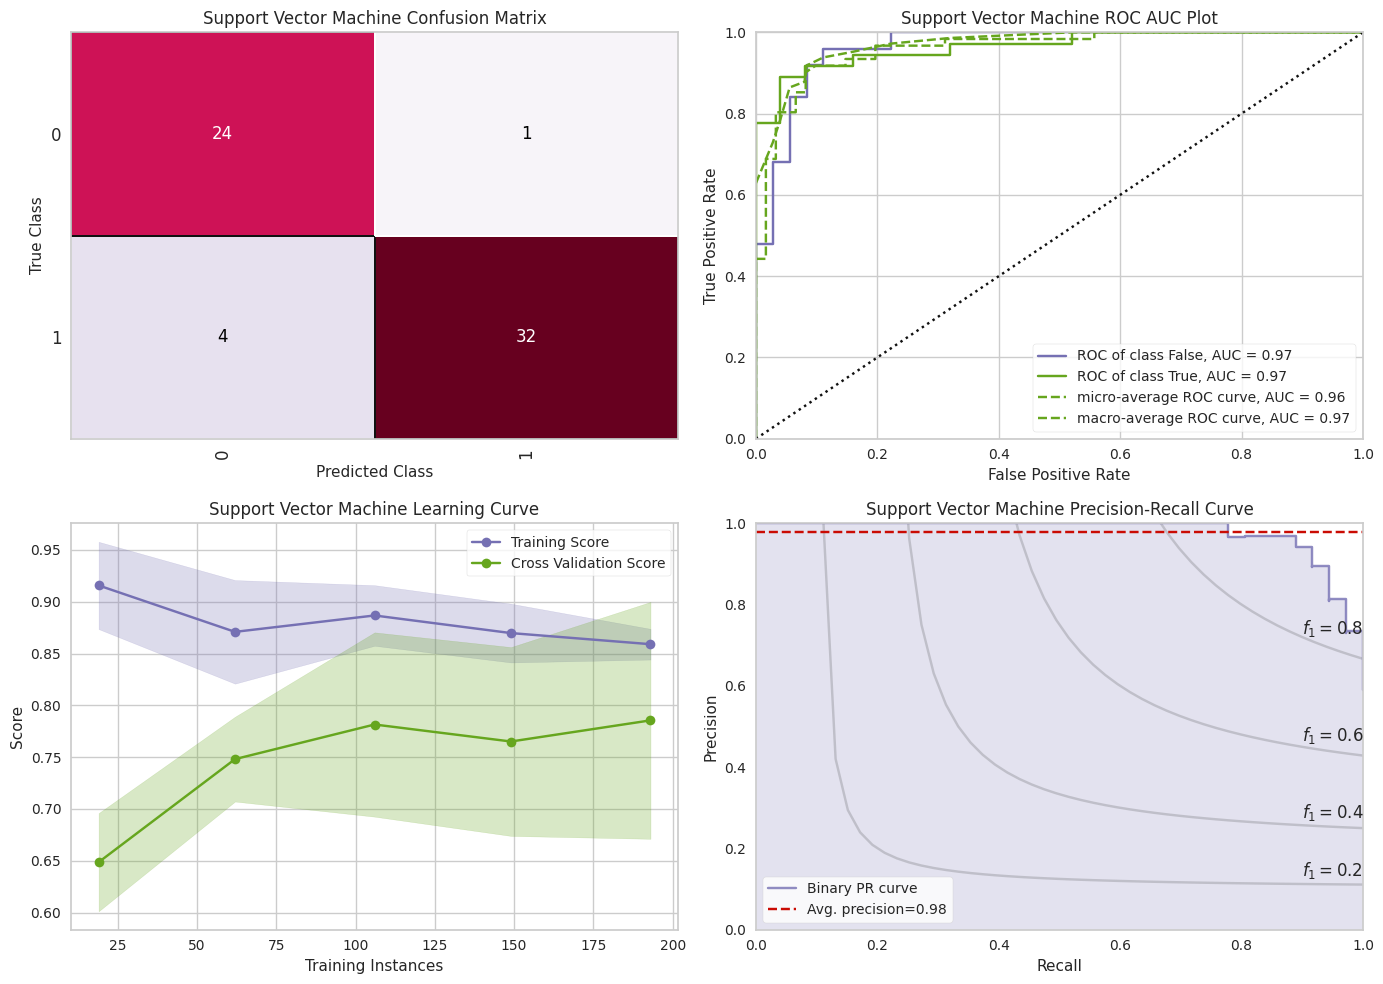

In [18]:
# --- SVM Accuracy ---
SVMAcc = accuracy_score(y_pred_SVM, y_test)
print('.:. Support Vector Machine Accuracy:'+'\033[1m {:.2f}%'.format(SVMAcc*100)+' .:.')

# --- SVM Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_SVM))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- SVM Confusion Matrix ---
svmmatrix = ConfusionMatrix(SVMclassifier, ax=ax1, cmap='PuRd',
                            title='Support Vector Machine Confusion Matrix')
svmmatrix.fit(x_train, y_train)
svmmatrix.score(x_test, y_test)
svmmatrix.finalize()

# --- SVM ROC AUC ---
svmrocauc = ROCAUC(SVMclassifier, classes=['False', 'True'], ax=ax2,
                   title='Support Vector Machine ROC AUC Plot')
svmrocauc.fit(x_train, y_train)
svmrocauc.score(x_test, y_test)
svmrocauc.finalize()

# --- SVM Learning Curve ---
svmlc = LearningCurve(SVMclassifier, ax=ax3, title='Support Vector Machine Learning Curve')
svmlc.fit(x_train, y_train)
svmlc.finalize()

# --- SVM Precision Recall Curve ---
svmcurve = PrecisionRecallCurve(SVMclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Support Vector Machine Precision-Recall Curve')
svmcurve.fit(x_train, y_train)
svmcurve.score(x_test, y_test)
svmcurve.finalize()

plt.tight_layout();

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.4 | Gaussian Naive Bayes</div>
<div style="font-family: Segoe UI; line-height: 2; color: #fffff; text-align: justify">
    <blockquote style="color: #fffff;">
    <mark><b>Naive Bayes Classifiers</b></mark> are based on the Bayes Theorem, which <b>one assumption taken is the strong independence assumptions between the features</b>. These classifiers assume that the value of a particular feature is independent of the value of any other feature. In a supervised learning situation, Naive Bayes Classifiers are trained very efficiently. Naive Bayes classifiers <b>need a small training data to estimate the parameters needed for classification</b>. Naive Bayes Classifiers have simple design and implementation and they can applied to many real life situations.<br><br>
    <mark><b>Gaussian Naive Bayes</b></mark> is a <b>variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data</b>. When working with continuous data, an assumption often taken is that the continuous values associated with each class are distributed according to a normal (or Gaussian) distribution.<br>
    <center>
    <img src="https://iq.opengenus.org/content/images/2020/02/Illustration-of-how-a-Gaussian-Naive-Bayes-GNB-classifier-works-For-each-data-point.png" alt="GNB" width="35%"><br>
    <i>🖼 Gaussian Naive Bayes by OpenGenus</i>
    </center>
    </blockquote>
</div>

In [19]:
# --- Applying Gaussian NB ---
GNBclassifier = GaussianNB(var_smoothing=0.1)
GNBclassifier.fit(x_train, y_train)

y_pred_GNB = GNBclassifier.predict(x_test)

.:. Gaussian Naive Bayes Accuracy: 88.52% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.80      0.96      0.87        25
           1       0.97      0.83      0.90        36

    accuracy                           0.89        61
   macro avg       0.88      0.90      0.88        61
weighted avg       0.90      0.89      0.89        61


.: Performance Evaluation
**************************


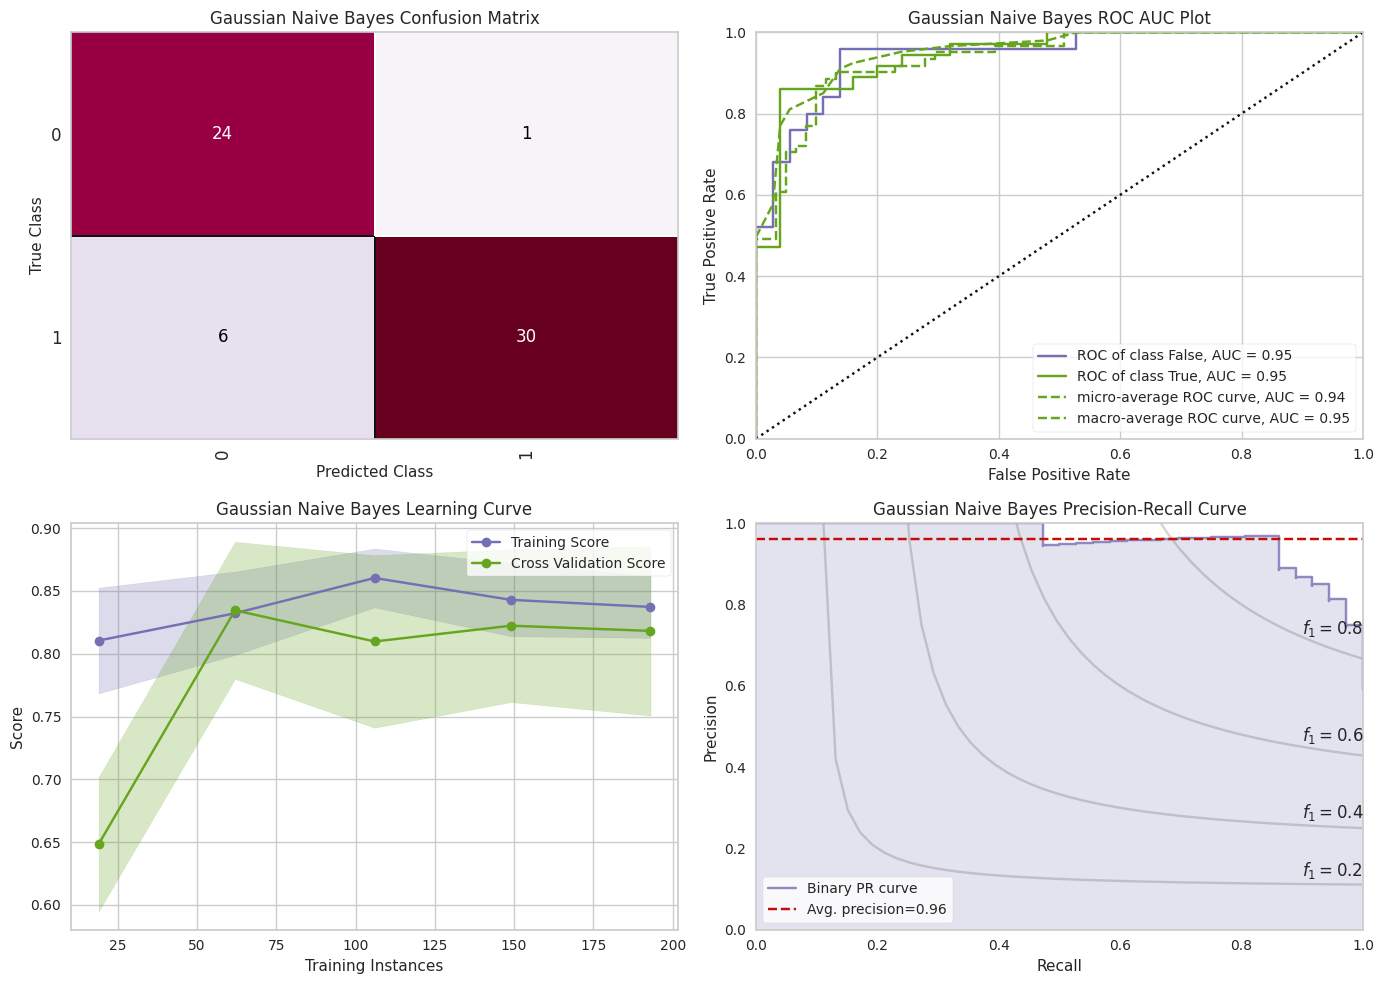

In [20]:
# --- GNB Accuracy ---
GNBAcc = accuracy_score(y_pred_GNB, y_test)
print('.:. Gaussian Naive Bayes Accuracy:'+'\033[1m {:.2f}%'.format(GNBAcc*100)+' .:.')

# --- GNB Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_GNB))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- GNB Confusion Matrix ---
gnbmatrix = ConfusionMatrix(GNBclassifier, ax=ax1, cmap='PuRd',
                            title='Gaussian Naive Bayes Confusion Matrix')
gnbmatrix.fit(x_train, y_train)
gnbmatrix.score(x_test, y_test)
gnbmatrix.finalize()

# --- GNB ROC AUC ---
gnbrocauc = ROCAUC(GNBclassifier, classes=['False', 'True'], ax=ax2,
                   title='Gaussian Naive Bayes ROC AUC Plot')
gnbrocauc.fit(x_train, y_train)
gnbrocauc.score(x_test, y_test)
gnbrocauc.finalize()

# --- GNB Learning Curve ---
gnblc = LearningCurve(GNBclassifier, ax=ax3, title='Gaussian Naive Bayes Learning Curve')
gnblc.fit(x_train, y_train)
gnblc.finalize()

# --- GNB Precision Recall Curve ---
gnbcurve = PrecisionRecallCurve(GNBclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Gaussian Naive Bayes Precision-Recall Curve')
gnbcurve.fit(x_train, y_train)
gnbcurve.score(x_test, y_test)
gnbcurve.finalize()

plt.tight_layout();

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.5 | Decision Tree</div>
<div style="font-family: Segoe UI; line-height: 2; color: #fffff; text-align: justify">
    <blockquote style="color: #fffff;">
    <mark><b>Decision Tree</b></mark> is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where <b>internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome</b>.<br><br>
    In a Decision tree, there are <b>two nodes</b>, which are the <mark><b>Decision Node and Leaf Node</b></mark>. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.<br>
    <center>
    <img src="https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png" alt="DT" width="35%"><br>
    <i>🖼 Decision Tree by Javatpoint</i>
    </center>
    </blockquote>
</div>

In [21]:
# --- Applying Decision Tree ---
DTCclassifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy', min_samples_split=5,
                                       splitter='random', random_state=1)

DTCclassifier.fit(x_train, y_train)
y_pred_DTC = DTCclassifier.predict(x_test)

.:. Decision Tree Accuracy: 88.52% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.80      0.96      0.87        25
           1       0.97      0.83      0.90        36

    accuracy                           0.89        61
   macro avg       0.88      0.90      0.88        61
weighted avg       0.90      0.89      0.89        61


.: Performance Evaluation
**************************


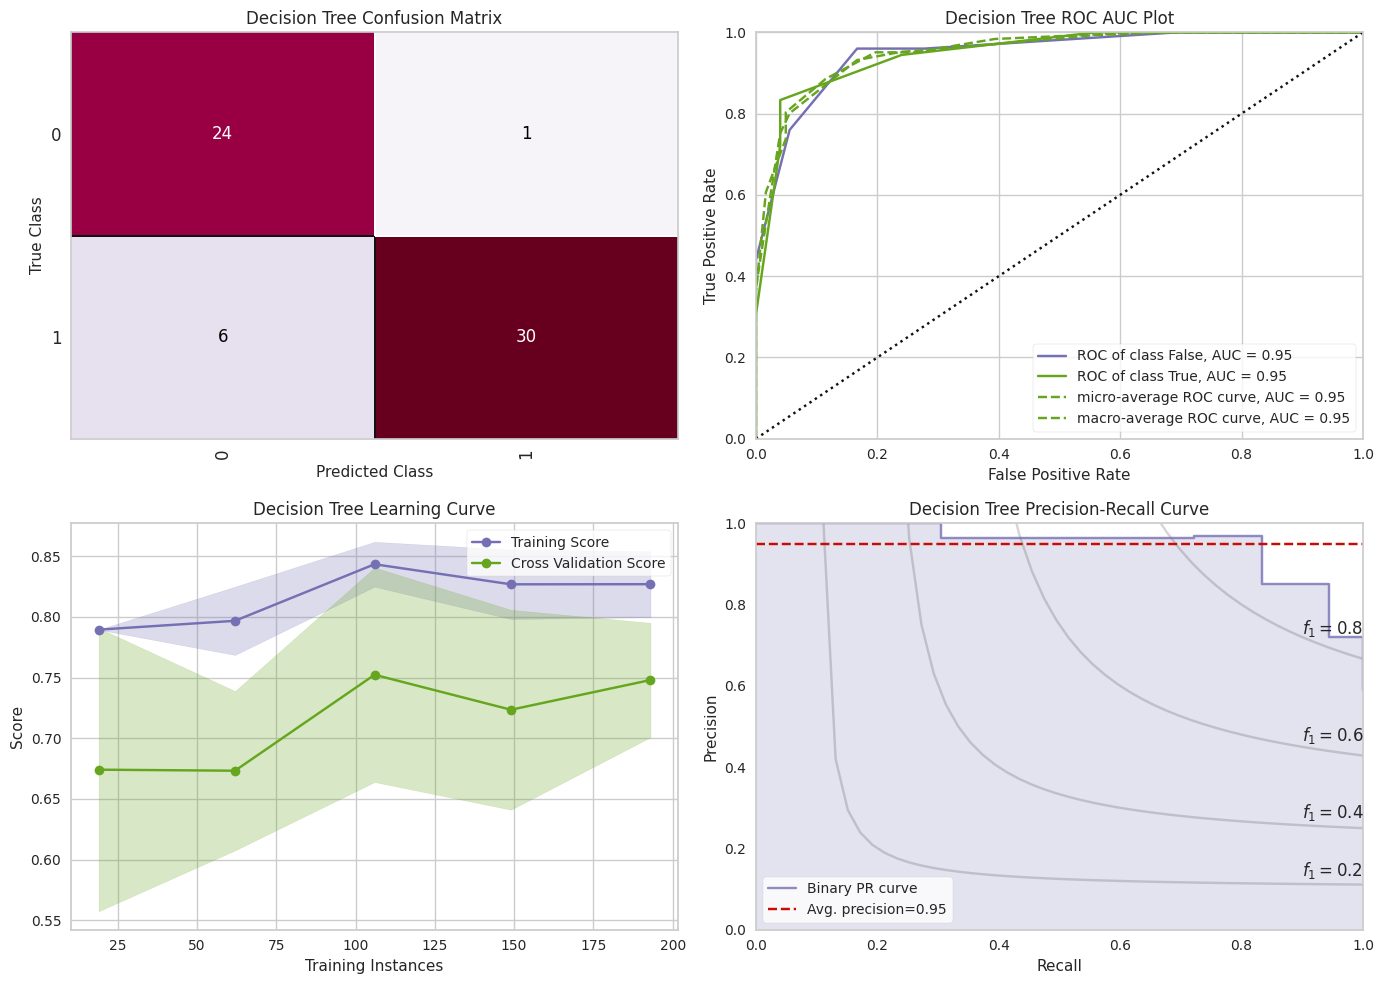

In [22]:
# --- Decision Tree Accuracy ---
DTCAcc = accuracy_score(y_pred_DTC, y_test)
print('.:. Decision Tree Accuracy:'+'\033[1m {:.2f}%'.format(DTCAcc*100)+' .:.')

# --- Decision Tree Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_DTC))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Decision Tree Confusion Matrix ---
dtcmatrix = ConfusionMatrix(DTCclassifier, ax=ax1, cmap='PuRd',
                            title='Decision Tree Confusion Matrix')
dtcmatrix.fit(x_train, y_train)
dtcmatrix.score(x_test, y_test)
dtcmatrix.finalize()

# --- Decision Tree ROC AUC ---
dtcrocauc = ROCAUC(DTCclassifier, classes=['False', 'True'], ax=ax2,
                   title='Decision Tree ROC AUC Plot')
dtcrocauc.fit(x_train, y_train)
dtcrocauc.score(x_test, y_test)
dtcrocauc.finalize()

# --- Decision Tree Learning Curve ---
dtclc = LearningCurve(DTCclassifier, ax=ax3, title='Decision Tree Learning Curve')
dtclc.fit(x_train, y_train)
dtclc.finalize()

# --- Decision Tree Precision Recall Curve ---
dtccurve = PrecisionRecallCurve(DTCclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                                title='Decision Tree Precision-Recall Curve')
dtccurve.fit(x_train, y_train)
dtccurve.score(x_test, y_test)
dtccurve.finalize()

plt.tight_layout();

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.6 | Random Forest</div>
<div style="font-family: Segoe UI; line-height: 2; color: #fffff; text-align: justify">
    <blockquote style="color: #fffff;">
    <mark><b>Random Forest</b></mark> is a tree-based machine learning algorithm that <b>leverages the power of multiple decision trees for making decisions</b>. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. <b>A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models</b>.<br>
    <center>
    <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/rfc_vs_dt1.png" alt="RF" width="35%"><br>
    <i>🖼 Random Forest by Abhishek Sharma</i>
    </center>
    </blockquote>
</div>

In [23]:
# --- Applying Random Forest ---
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(x_train, y_train)
y_pred_RF = RFclassifier.predict(x_test)

.:. Random Forest Accuracy: 91.80% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        25
           1       0.97      0.89      0.93        36

    accuracy                           0.92        61
   macro avg       0.91      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61


.: Performance Evaluation
**************************


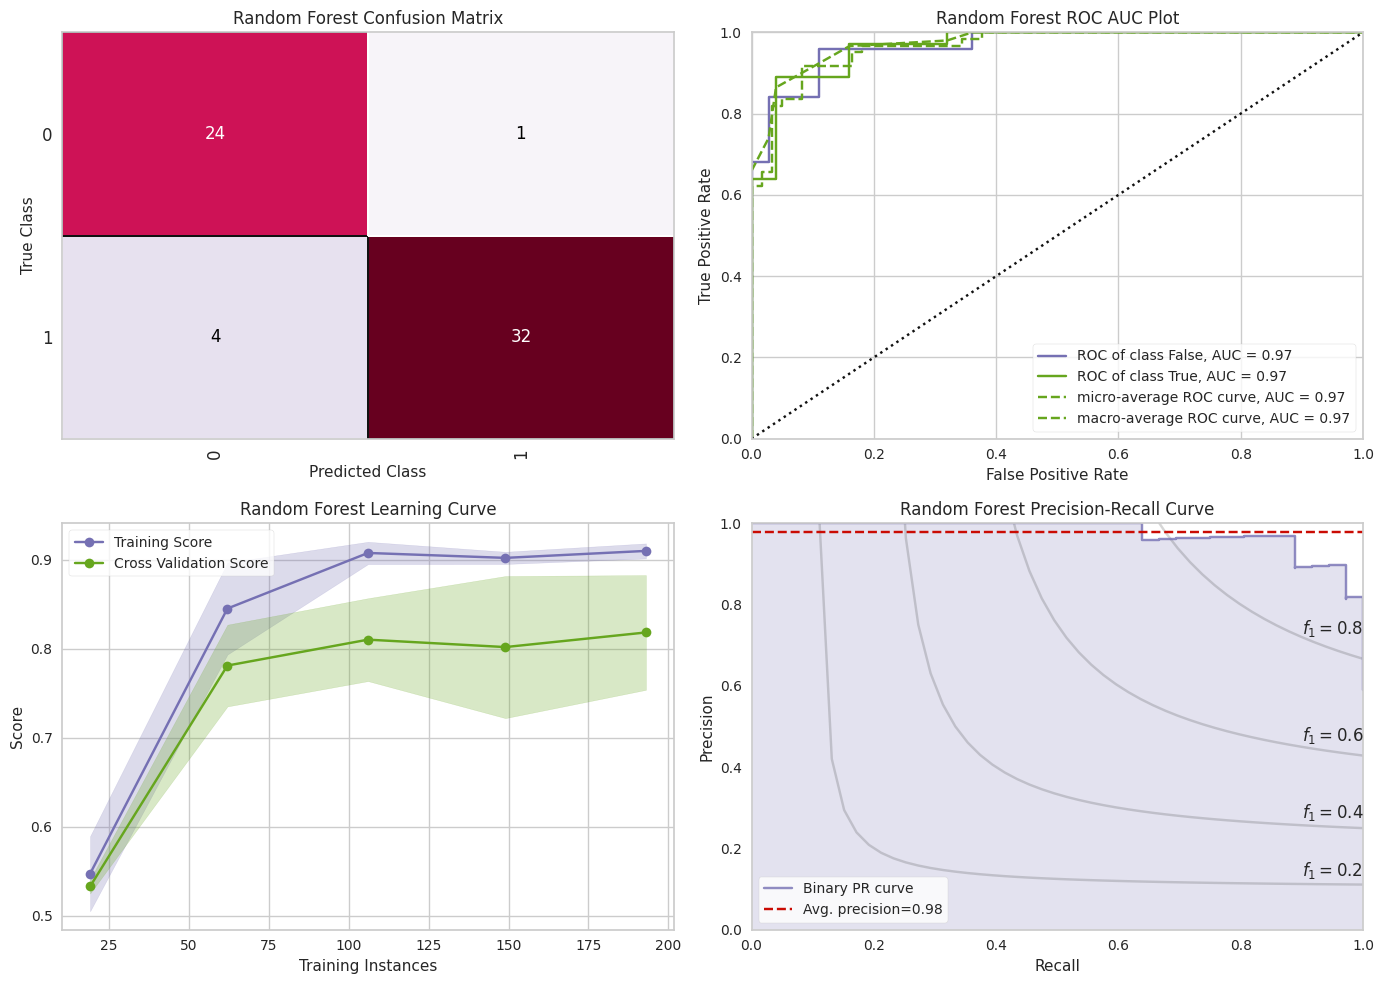

In [24]:
# --- Random Forest Accuracy ---
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

# --- Random FOrest Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_RF))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Random Forest Confusion Matrix ---
rfcmatrix = ConfusionMatrix(RFclassifier, ax=ax1, cmap='PuRd',
                            title='Random Forest Confusion Matrix')
rfcmatrix.fit(x_train, y_train)
rfcmatrix.score(x_test, y_test)
rfcmatrix.finalize()

# --- Random Forest ROC AUC ---
rccrocauc = ROCAUC(RFclassifier, classes=['False', 'True'], ax=ax2,
                   title='Random Forest ROC AUC Plot')
rccrocauc.fit(x_train, y_train)
rccrocauc.score(x_test, y_test)
rccrocauc.finalize()

# --- Random Forest Learning Curve ---
rcclc = LearningCurve(RFclassifier, ax=ax3, title='Random Forest Learning Curve')
rcclc.fit(x_train, y_train)
rcclc.finalize()

# --- Random Forest Precision Recall Curve ---
rcccurve = PrecisionRecallCurve(RFclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                                title='Random Forest Precision-Recall Curve')
rcccurve.fit(x_train, y_train)
rcccurve.score(x_test, y_test)
rcccurve.finalize()

plt.tight_layout();

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.7 | Extra Tree Classifier</div>
<div style="font-family: Segoe UI; line-height: 2; color: #fffff; text-align: justify">
    <blockquote style="color: #fffff;">
    <mark><b>Extra Trees Classifier</b></mark> is a type of ensemble learning technique which <b>aggregates the results of multiple de-correlated decision trees collected in a "forest" to output it’s classification result</b>. In concept, it is very similar to a Random Forest Classifier and only differs from it in the manner of construction of the decision trees in the forest.<br><br>
    Each Decision Tree in the Extra Trees Forest is <b>constructed from the original training sample</b>. Then, at each test node, each tree is provided with a <b>random sample of k features</b> from the feature-set from which each decision tree must select the best feature to split the data based on some mathematical criteria (typically the Gini Index). This random sample of features leads to the creation of multiple de-correlated decision trees.
    </blockquote>
</div>

In [25]:
# --- Applying ET ---
ETclassifier = ExtraTreesClassifier(n_estimators=15, random_state=47)

ETclassifier.fit(x_train, y_train)
y_pred_ET = ETclassifier.predict(x_test)

.:. Extra Tree Classifier Accuracy: 91.80% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        25
           1       0.94      0.92      0.93        36

    accuracy                           0.92        61
   macro avg       0.91      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61


.: Performance Evaluation
**************************


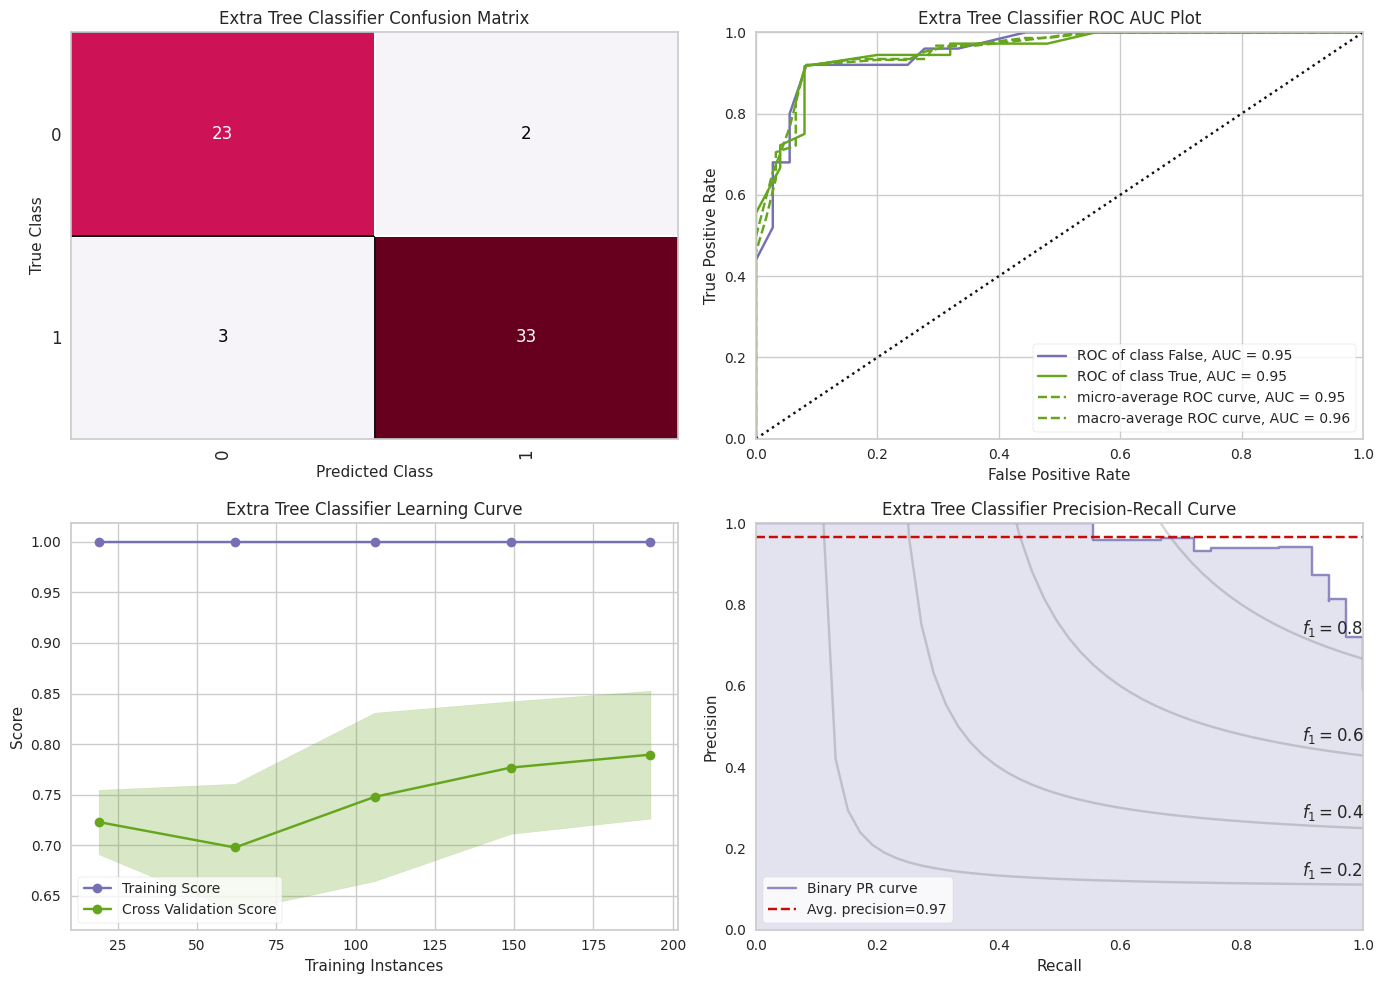

In [26]:
# --- ET Accuracy ---
ETAcc = accuracy_score(y_pred_ET, y_test)
print('.:. Extra Tree Classifier Accuracy:'+'\033[1m {:.2f}%'.format(ETAcc*100)+' .:.')

# --- ET Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_ET))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- ET Confusion Matrix ---
etcmatrix = ConfusionMatrix(ETclassifier, ax=ax1, cmap='PuRd',
                            title='Extra Tree Classifier Confusion Matrix')
etcmatrix.fit(x_train, y_train)
etcmatrix.score(x_test, y_test)
etcmatrix.finalize()

# --- ET ROC AUC ---
etrocauc = ROCAUC(ETclassifier, classes=['False', 'True'], ax=ax2,
                  title='Extra Tree Classifier ROC AUC Plot')
etrocauc.fit(x_train, y_train)
etrocauc.score(x_test, y_test)
etrocauc.finalize()

# --- ET Learning Curve ---
etlc = LearningCurve(ETclassifier, ax=ax3, title='Extra Tree Classifier Learning Curve')
etlc.fit(x_train, y_train)
etlc.finalize()

# --- ET Precision Recall Curve ---
etpc = PrecisionRecallCurve(ETclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                            title='Extra Tree Classifier Precision-Recall Curve')
etpc.fit(x_train, y_train)
etpc.score(x_test, y_test)
etpc.finalize()

plt.tight_layout();

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.8 | Gradient Boosting</div>
<div style="font-family: Segoe UI; line-height: 2; color: #fffff; text-align: justify">
    <blockquote style="color: #fffff;">
    <mark><b>Boosting</b></mark> is a method of <b>converting weak learners into strong learners</b>. In boosting, <b>each new tree is a fit on a modified version</b> of the original data set. It strongly relies on the prediction that the next model will reduce prediction errors when blended with previous ones. The main idea is <b>to establish target outcomes for this upcoming model to minimize errors</b>.<br><br>
    <mark><b>Gradient Boosting</b></mark> trains many models in <b>a gradual, additive and sequential manner</b>. The term gradient boosting emerged because every case’s target outcomes are based on the gradient’s error with regards to the predictions. Every model reduces prediction errors by taking a step in the correct direction.<br>
    <center>
    <img src="https://www.researchgate.net/publication/345327934/figure/fig3/AS:1022810793209856@1620868504478/Flow-chart-of-XGBoost.png" alt="GB" width="35%"><br>
    <i>🖼 Boosting Algorithm by Rui Guo et al.</i>
    </center>
    </blockquote>
</div>

In [27]:
# --- Applying Gradient Boosting ---
GBclassifier = GradientBoostingClassifier(random_state=1, n_estimators=100, max_leaf_nodes=3, loss='exponential', 
                                          min_samples_leaf=20)

GBclassifier.fit(x_train, y_train)
y_pred_GB = GBclassifier.predict(x_test)

.:. Gradient Boosting Accuracy: 95.08% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        25
           1       0.95      0.97      0.96        36

    accuracy                           0.95        61
   macro avg       0.95      0.95      0.95        61
weighted avg       0.95      0.95      0.95        61


.: Performance Evaluation
**************************


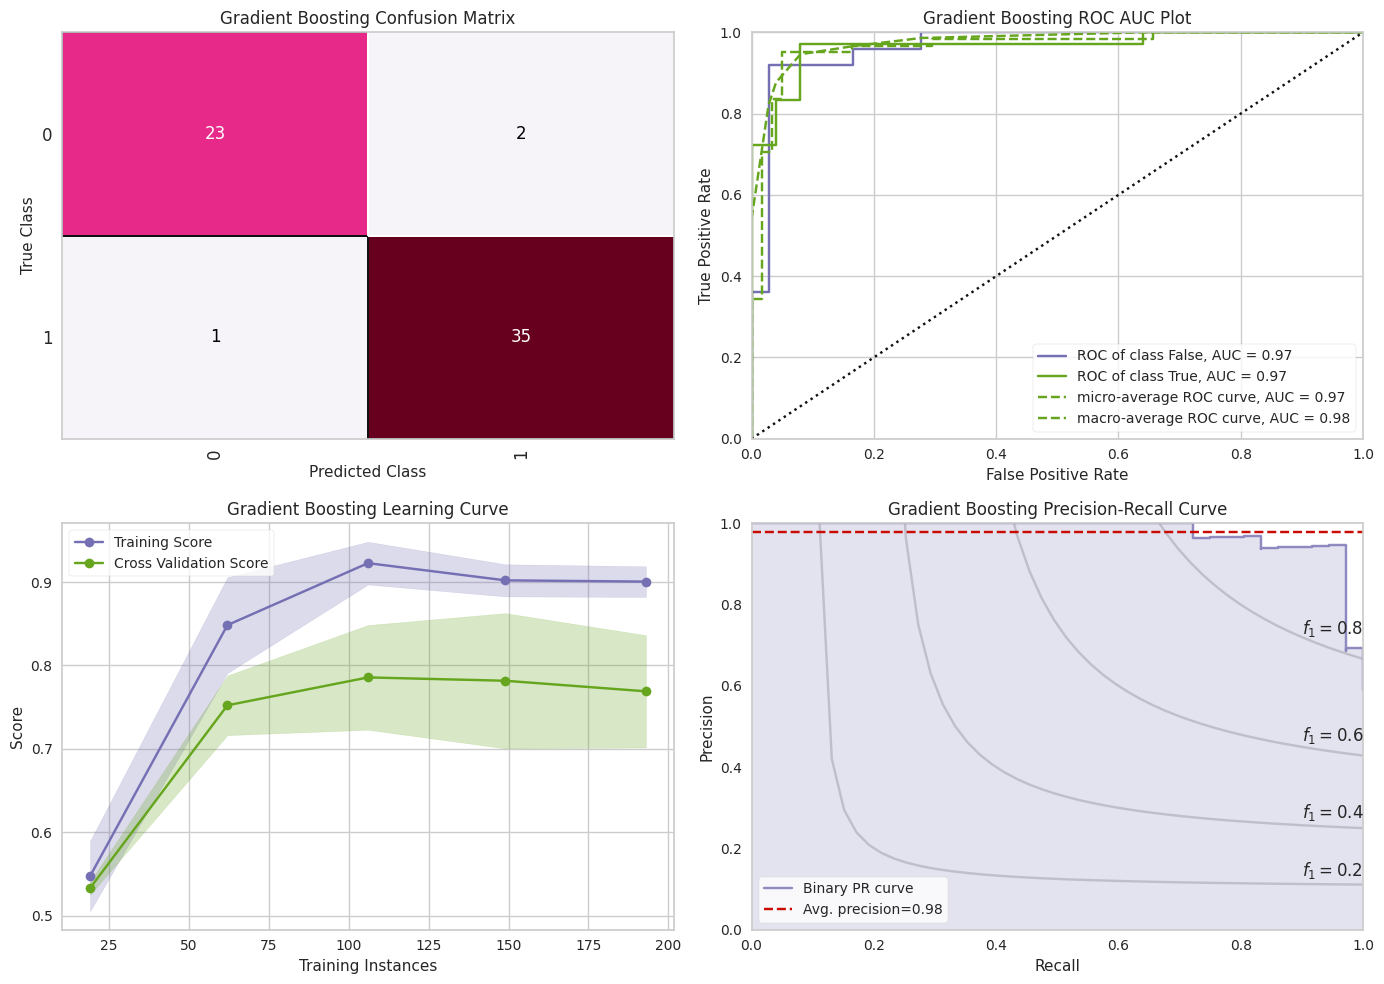

In [28]:
# --- Gradient Boosting Accuracy ---
GBAcc = accuracy_score(y_pred_GB, y_test)
print('.:. Gradient Boosting Accuracy:'+'\033[1m {:.2f}%'.format(GBAcc*100)+' .:.')

# --- Gradient Boosting Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_GB))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Gradient Boosting Confusion Matrix ---
gbcmatrix = ConfusionMatrix(GBclassifier, ax=ax1, cmap='PuRd',
                            title='Gradient Boosting Confusion Matrix')
gbcmatrix.fit(x_train, y_train)
gbcmatrix.score(x_test, y_test)
gbcmatrix.finalize()

# --- Gradient Boosting ROC AUC ---
gbcrocauc = ROCAUC(GBclassifier, classes=['False', 'True'], ax=ax2,
                   title='Gradient Boosting ROC AUC Plot')
gbcrocauc.fit(x_train, y_train)
gbcrocauc.score(x_test, y_test)
gbcrocauc.finalize()

# --- Gradient Boosting Learning Curve ---
gbclc = LearningCurve(GBclassifier, ax=ax3, title='Gradient Boosting Learning Curve')
gbclc.fit(x_train, y_train)
gbclc.finalize()

# --- Gradient Boosting Precision Recall Curve ---
gbcurve = PrecisionRecallCurve(GBclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                                title='Gradient Boosting Precision-Recall Curve')
gbcurve.fit(x_train, y_train)
gbcurve.score(x_test, y_test)
gbcurve.finalize()

plt.tight_layout();

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.9 | AdaBoost</div>
<div style="font-family: Segoe UI; line-height: 2; color: #fffff; text-align: justify">
    <blockquote style="color: #fffff;">
    <mark><b>AdaBoost</b></mark> also called <b>Adaptive Boosting</b> is a technique in Machine Learning used as an Ensemble Method. The most common algorithm used with AdaBoost is <b>decision trees with one level</b> that means with Decision trees with only 1 split. These trees are also called <mark><b>Decision Stumps</b></mark>. <b>AdaBoost builds a model and gives equal weights to all the data points</b>. It then assigns higher weights to points that are wrongly classified. Now, all the points which have higher weights are given more importance in the next model. It will keep training models until and unless a lowe error is received.
    </blockquote>
</div>

In [29]:
# --- Applying AdaBoost ---
ABclassifier = AdaBoostClassifier(n_estimators=3)

ABclassifier.fit(x_train, y_train)
y_pred_AB = ABclassifier.predict(x_test)

.:. AdaBoost Accuracy: 91.80% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        25
           1       0.92      0.94      0.93        36

    accuracy                           0.92        61
   macro avg       0.92      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61


.: Performance Evaluation
**************************


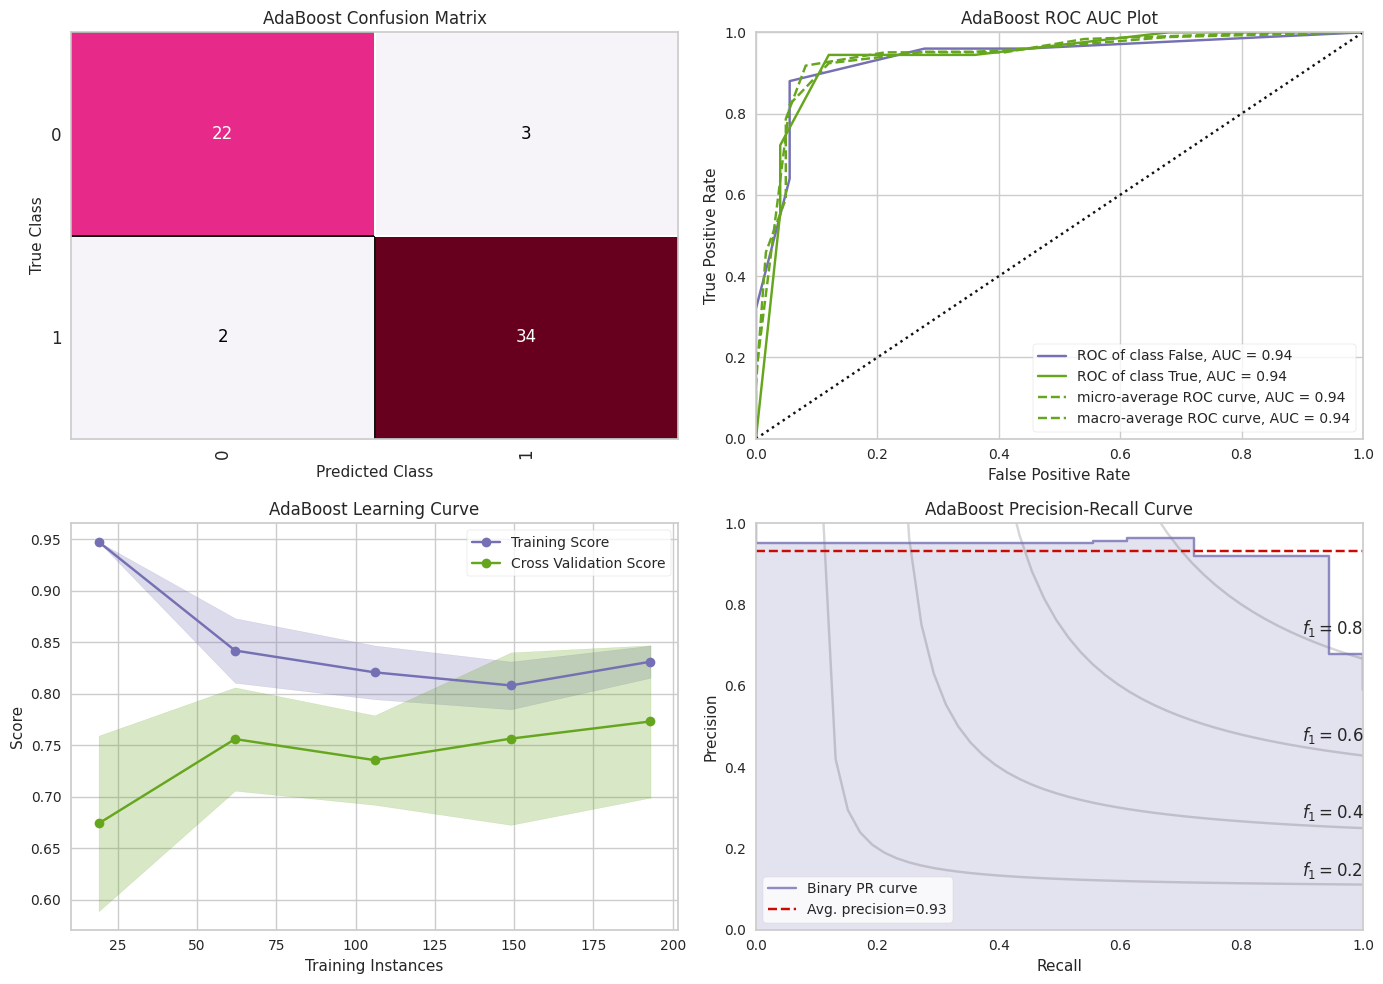

In [30]:
# --- AdaBoost Accuracy ---
ABAcc = accuracy_score(y_pred_AB, y_test)
print('.:. AdaBoost Accuracy:'+'\033[1m {:.2f}%'.format(ABAcc*100)+' .:.')

# --- AdaBoost Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_AB))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- AdaBoost Confusion Matrix ---
abcmatrix = ConfusionMatrix(ABclassifier, ax=ax1, cmap='PuRd',
                            title='AdaBoost Confusion Matrix')
abcmatrix.fit(x_train, y_train)
abcmatrix.score(x_test, y_test)
abcmatrix.finalize()

# --- AdaBoost ROC AUC ---
abrocauc = ROCAUC(ABclassifier, classes=['False', 'True'], ax=ax2,
                  title='AdaBoost ROC AUC Plot')
abrocauc.fit(x_train, y_train)
abrocauc.score(x_test, y_test)
abrocauc.finalize()

# --- AdaBoost Learning Curve ---
ablc = LearningCurve(ABclassifier, ax=ax3, title='AdaBoost Learning Curve')
ablc.fit(x_train, y_train)
ablc.finalize()

# --- AdaBoost Precision Recall Curve ---
abpc = PrecisionRecallCurve(ABclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                            title='AdaBoost Precision-Recall Curve')
abpc.fit(x_train, y_train)
abpc.score(x_test, y_test)
abpc.finalize()

plt.tight_layout();

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.10 | XGBBoost</div>
<div style="font-family: Segoe UI; line-height: 2; color: #fffff; text-align: justify">
<blockquote style="color: #fffff;">
    <mark><b>XGBoost</b></mark> XGBoost is a machine learning algorithm that uses decision trees to make predictions. It's an ensemble method, meaning it combines multiple models to improve accuracy.<br>XGBoost is known for its speed and scalability, and it can handle large datasets with many features. It uses a technique called gradient boosting to iteratively improve the predictions of a base model.<br>XGBoost also includes a number of regularization techniques to prevent overfitting, such as L1 and L2 regularization and early stopping.<br>Overall, XGBoost is a powerful and versatile algorithm that can be applied to a wide range of machine learning problems.
</blockquote>
</div>

In [59]:
# Create XGBoost Classifier object with default hyperparameters
XGBclassifier = xgb.XGBClassifier()

# Train the model on the training data
XGBclassifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred_XGB = XGBclassifier.predict(x_test)

.:. XGBoost Accuracy: 90.16% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        25
           1       0.92      0.92      0.92        36

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61


.: Performance Evaluation
**************************


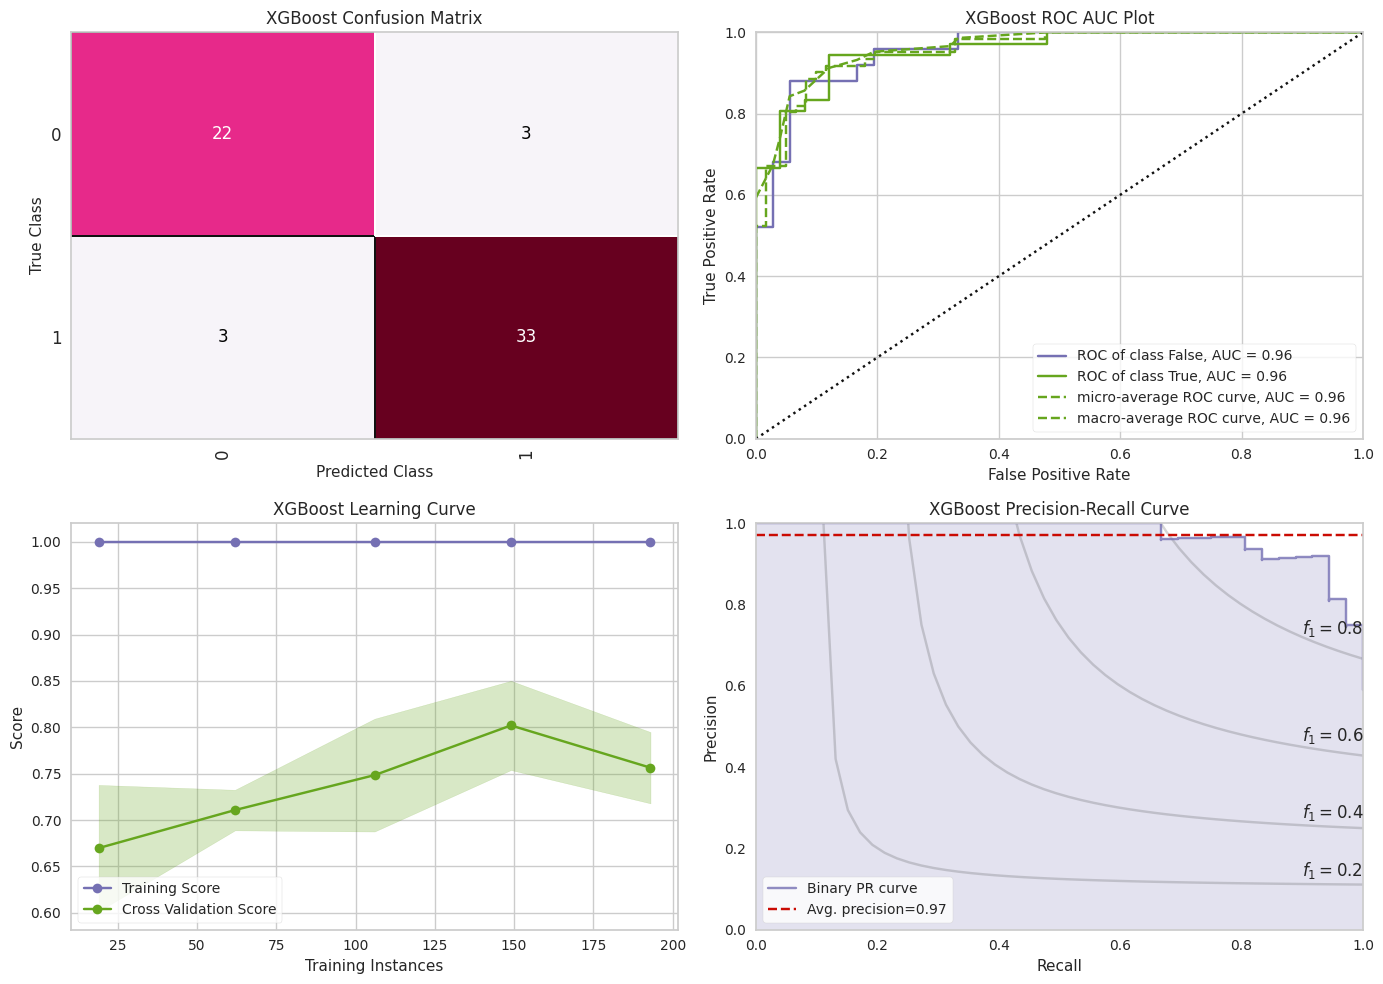

In [60]:
# --- XGBoost Accuracy ---
XGAcc = accuracy_score(y_pred_XGB, y_test)
print('.:. XGBoost Accuracy:'+'\033[1m {:.2f}%'.format(XGAcc*100)+' .:.')

# --- XGBoost Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_XGB))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- XGBoost Confusion Matrix ---
xgcmatrix = ConfusionMatrix(XGBclassifier, ax=ax1, cmap='PuRd',
                            title='XGBoost Confusion Matrix')
xgcmatrix.fit(x_train, y_train)
xgcmatrix.score(x_test, y_test)
xgcmatrix.finalize()

# --- XGBoost ROC AUC ---
xgrocauc = ROCAUC(XGBclassifier, classes=['False', 'True'], ax=ax2,
                  title='XGBoost ROC AUC Plot')
xgrocauc.fit(x_train, y_train)
xgrocauc.score(x_test, y_test)
xgrocauc.finalize()

# --- XGBoost Learning Curve ---
xglc = LearningCurve(XGBclassifier, ax=ax3, title='XGBoost Learning Curve')
xglc.fit(x_train, y_train)
xglc.finalize()

# --- XGBoost Precision Recall Curve ---
xgpc = PrecisionRecallCurve(XGBclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                            title='XGBoost Precision-Recall Curve')
xgpc.fit(x_train, y_train)
xgpc.score(x_test, y_test)
xgpc.finalize()

plt.tight_layout();


## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.10 | Model Comparison 👀</div>
<div style="font-family: Segoe UI; line-height: 2; color: #fffff; text-align: justify">
    👉 After implementing 10 models, this section will <b>compare machine learning models</b>.
</div>

In [61]:
# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                  'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 
                                  'AdaBoost','Extra Tree Classifier','XgbBoost'], 
                        'Accuracy': [LRAcc*100, KNNAcc*100, SVMAcc*100, GNBAcc*100, DTCAcc*100, RFAcc*100, GBAcc*100, 
                                     ABAcc*100, ETAcc*100, XGAcc*100]})

# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

Model,Accuracy
Gradient Boosting,95.081967
Logistic Regression,91.803279
Support Vector Machine,91.803279
Random Forest,91.803279
AdaBoost,91.803279
Extra Tree Classifier,91.803279
XgbBoost,90.163934
Gaussian Naive Bayes,88.524590
Decision Tree,88.524590
K-Nearest Neighbour,86.885246
